# Atividade 5 - Redes Neurais MLP
Nesta atividade iremos trabalhar com o problema de classificação de dígitos em imagens, utilizando o conhecido conjunto de dados MNIST.

O conjunto de dados é formado por imagens preto e branco de 28x28 pixels que representam dígitos escritos à mão, de 0 à 9. Cada pixel possui um valor entre 0 (totalmente preto) e 255 (totalmente branco). O desafio é treinar um modelo para reconhecer corretamente cada dígito representado. Ou seja, é um problema de classificação multi-classe de 10 classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). O conjunto já é previamente dividido em treino e teste.

Dado esse problema, faça o que se pede:

1. Treine e avalie (no conjunto de teste) um classificador baseline com uma MLP de uma camada. Defina a quantidade de neurônios na camada oculta e argumente o motivo da sua escolha. Utilize métricas de desempenho para classificação multiclasse de sua escolha.

2. Crie uma arquitetura de MLP realizando a otimização de hiperparâmetros, usando uma técnica da sua escolha (grid search, random search). Os hiperparâmetros que serão otimizados são de sua escolha, mas devem conter o número de camadas e o número de neurônios em cada camada. Teste o melhor modelo encontrado no conjunto de teste e compare com o baseline.

OBS¹: A forma mais simples de extração de atributos de imagens é considerar cada pixel como um atributo. Para isso, basta transformar a matriz de cada imagem em um vetor unidimensional. Outras técnicas de extração de atributos baseadas em PDI (processamento digital de imagens) podem ser utilizadas.

OBS²: A MLP pode ser utilizada com a implementação do scikit-learn ou do keras.

X_train_val: (60000, 28, 28)
Y_train_val: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
x_train: (48000, 28, 28)
x_val: (12000, 28, 28)
y_train: (48000,)
y_val: (12000,)


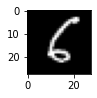

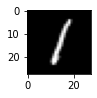

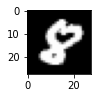

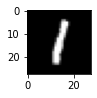

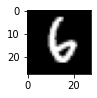

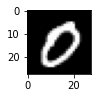

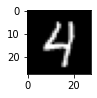

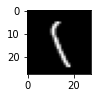

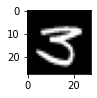

In [53]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#loading
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

#shape of dataset
print('X_train_val: ' + str(X_train_val.shape))
print('Y_train_val: ' + str(y_train_val.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))
print('x_train: ' + str(X_train.shape))
print('x_val: ' + str(X_val.shape))
print('y_train: ' + str(y_train.shape))
print('y_val: ' + str(y_val.shape))
#plotting
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [54]:
#features = X_train.reshape(-1)
#features
#X_train
image_size = X_train_val.shape[1]
input_size = image_size*image_size
X_train_val = np.reshape(X_train_val,[-1,input_size])
X_test = np.reshape(X_test,[-1,input_size])
X_val = np.reshape(X_val,[-1,input_size])
X_train = np.reshape(X_train,[-1,input_size])


In [55]:
#Já sabemos que cada pixel tem seu código de cor único e também sabemos que ele tem um valor máximo de 255. 
#É importante converter todos os valores de 0 a 255 de cada pixel para um intervalo de valores de 0 a 1. 
#A maneira mais simples é dividir o valor de cada pixel por 255 para obter os valores no intervalo de 0 a 1.
#Normalização
X_train_val = X_train_val / 255
X_test = X_test / 255
X_val = X_val/255
X_train=X_train/255

### Parte1: Modelo Baseline --- MLP

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
model_baseline = MLPClassifier(hidden_layer_sizes=(200,))
model_baseline.fit(X_train_val,y_train_val)
#Defini em 200 neurônios para a camada oculta pelo fato de a rede base apresentar um bom resultado e percebi também, que colocando acima de 200 neurônios, aumenta ainda mais o custo computacional e o modelo não melhora quase nada.

MLPClassifier(hidden_layer_sizes=(200,))

In [57]:
y_pred = model_baseline.predict(X_test)

In [58]:
print(f'A acurácia do baseline foi: {accuracy_score(y_test,y_pred)*100}%')


A acurácia do baseline foi: 98.1%


In [29]:
#from sklearn.metrics import recall_score, precision_score, f1_score
#AUC_base = accuracy_score(y_test,y_pred)*100
#Recall_base = recall_score(y_test,y_pred,average=None)*100
#Precision_base = precision_score(y_test,y_pred,average=None)*100
#F1_base = f1_score(y_test,y_pred,average=None)*100'''

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

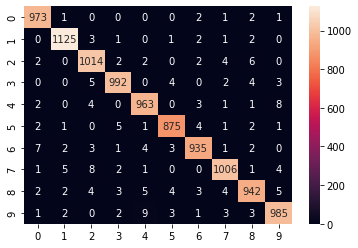

In [60]:
#Matriz de Confusão
from sklearn import metrics
import seaborn as sns
cm_base = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm_base, annot=True, fmt = 'd')

### Parte 2: Construção de Mellhor Arquitetura(Hiperparâmetros) -- MLP


### Possibilidade 1

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [10]:
model2 = MLPClassifier()
model2.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [11]:
from scipy.stats import uniform 
param = dict(
    alpha = [10**uniform.rvs(loc=-5, scale=4)],
    activation=['relu','logistic','tanh'],
    tol = [0.01,0.001,0.0001],
    hidden_layer_sizes=[(200),(200,100)],
    max_iter= [50, 100, 300, 600]
)
random_search = RandomizedSearchCV(model2, param, random_state=42)
random_search.fit(X_train,y_train.ravel())

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic',
                                                       'tanh'],
                                        'alpha': [3.190021451766908e-05],
                                        'hidden_layer_sizes': [200, (200, 100)],
                                        'max_iter': [50, 100, 300, 600],
                                        'tol': [0.01, 0.001, 0.0001]},
                   random_state=42)

In [12]:
random_search.best_estimator_

MLPClassifier(activation='tanh', alpha=3.190021451766908e-05,
              hidden_layer_sizes=(200, 100), max_iter=50)

In [13]:
y_pred2 = random_search.predict(X_val).reshape(-1,1)

In [14]:
print(f'A acurácia da possibilidade 1 foi: {accuracy_score(y_val,y_pred2)*100}%')

A acurácia do baseline foi: 97.875%


In [15]:
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1161
           1       0.99      0.99      0.99      1362
           2       0.97      0.98      0.97      1192
           3       0.98      0.97      0.97      1222
           4       0.97      0.98      0.97      1132
           5       0.98      0.98      0.98      1073
           6       0.99      0.99      0.99      1202
           7       0.98      0.98      0.98      1260
           8       0.98      0.97      0.97      1168
           9       0.97      0.97      0.97      1228

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



<AxesSubplot:>

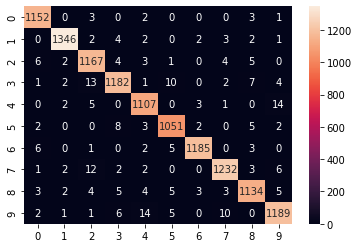

In [16]:
#Matriz de Confusão
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_val,y_pred2)
sns.heatmap(cm, annot=True, fmt = 'd')

### Possibilidade 2

In [32]:
import warnings
warnings.filterwarnings("ignore")
#O solucionador para otimização de peso.
# ‘Lbfgs’ é um otimizador na família de métodos quase Newton.
#'Sgd' refere-se à descida do gradiente estocástico.
#‘Adam’ refere-se a um otimizador baseado em gradiente estocástico proposto por Kingma, Diederik e Jimmy Ba

model3_1 = MLPClassifier(solver='sgd', hidden_layer_sizes=(300,300), alpha = 1e-5, max_iter=150)
model3_1.fit(X_train, y_train)   
pred3_1 = model3_1.predict(X_val)

model3_2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(200,200), alpha = 1e-5, max_iter=150)
model3_2.fit(X_train, y_train)   
pred3_2 = model3_2.predict(X_val)
print(f'Acurácia sgd: {accuracy_score(y_val,y_pred3_1)*100}%')
print(f'Acurácia lbfgs: {accuracy_score(y_val,y_pred3_2)*100}%')

Acurácia sgd: 97.75%
Acurácia lbfgs: 97.80833333333334%


In [34]:
print('sgd')
print(classification_report(y_val,y_pred3_1))
print('lbfgs')
print(classification_report(y_val,y_pred3_2))

sgd
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1172
           1       0.98      0.99      0.98      1311
           2       0.97      0.98      0.98      1190
           3       0.98      0.97      0.97      1196
           4       0.98      0.98      0.98      1184
           5       0.97      0.97      0.97      1085
           6       0.98      0.99      0.98      1201
           7       0.98      0.98      0.98      1326
           8       0.97      0.97      0.97      1169
           9       0.97      0.97      0.97      1166

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

lbfgs
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1172
           1       0.99      0.99      0.99      1311
           2       0.98      0.98      0.98      1190
           3  

Matriz de Confusão sgd


<AxesSubplot:>

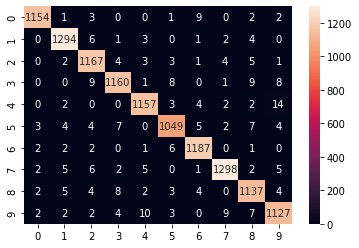

In [36]:
#Matriz de Confusão
from sklearn import metrics
import seaborn as sns
cm_3_1 = metrics.confusion_matrix(y_val,y_pred3_1)
print('Matriz de Confusão sgd')
sns.heatmap(cm_3_1, annot=True, fmt = 'd')

Matriz de Confusão lbfgs


<AxesSubplot:>

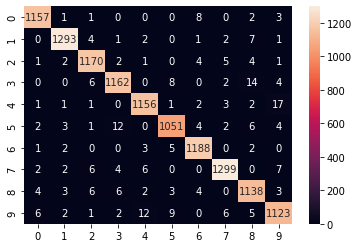

In [38]:
#Matriz de Confusão
from sklearn import metrics
import seaborn as sns
cm_3_2 = metrics.confusion_matrix(y_val,y_pred3_2)
print('Matriz de Confusão lbfgs')
sns.heatmap(cm_3_2, annot=True, fmt = 'd')

### Melhor Modelo
#### Analisando as métricas de resultados, o do random foi o melhor modelo 
##### Aplicando os dados de testes

In [61]:
model_best = MLPClassifier(activation='tanh', alpha=3.190021451766908e-05,
              hidden_layer_sizes=(200, 100), max_iter=50)
model_best.fit(X_train_val,y_train_val)

MLPClassifier(activation='tanh', alpha=3.190021451766908e-05,
              hidden_layer_sizes=(200, 100), max_iter=50)

In [62]:
y_pred_best = model_best.predict(X_test)

In [63]:
print(f'A acurácia do melhor modelo foi: {accuracy_score(y_test,y_pred_best)*100}%')

A acurácia do melhor modelo foi: 98.29%


In [64]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

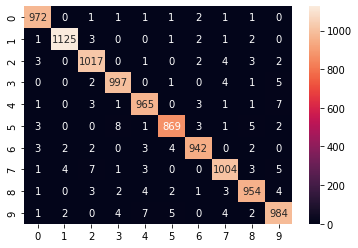

In [65]:
#Matriz de Confusão
from sklearn import metrics
import seaborn as sns
cm_3_1 = metrics.confusion_matrix(y_test,y_pred_best)
sns.heatmap(cm_3_1, annot=True, fmt = 'd')

## Comparação Baseline com Modelo Escolhido